In [2]:
import pandas as pd
import numpy as np
from pygobnilp.gobnilp import Gobnilp
import pgmpy
import itertools
from pgmpy.estimators.CITests import pearsonr
from pgmpy.estimators.CITests import chi_square
import networkx as nx
import time
import collections

In [2]:
def csv_format_discrete(csv_file):
    df = pd.read_csv(csv_file, sep="\s+")
    return df.drop([0])

#returns the csv_file in a pandas dataframe, formatted properly, discrete dataset only

In [3]:
#small network : n <= 20 nodes, medium network: 20 <= n <= 50 , large: 50 <= n <= 100, ... 
df_small = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat")
df_medium = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat")
df_alarm100 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_100.dat")
df_large = pd.read_csv(r'FORMED_final_0.csv')
df_large = df_large.drop([0])
# df_large = csv_format_discrete(r"")

In [4]:
df_large

,PCLRfacet3,AbilityToCope,Stress,ProblematicLifeEvents,Victimisation,ViolentThoughts,Impulsivity,BPD,AbuseNeglectAsChild,PCLRfactor2,...,Hallucinations,HallucinationsPT,StrangeExperiences,StrangeExperiencesPT,ParanoidDelusions,ParanoidDelusionsPT,PsychiatricTreatment,PsychiatricTreatmentGivenRFAT,MentalIllnessSymptomCount,MentalIllnessDL
1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,1,0,0,0,1,0,0,2,...,1,1,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,1,0,0,2,...,0,0,0,0,1,1,0,0,2,1
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1,1,0,0,1,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
99997,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
99998,1,0,0,0,0,0,1,1,1,1,...,1,1,0,0,0,0,0,0,1,0
99999,2,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### chi2 test 0th order

In [5]:
#0th order chi2 test
def chi2bool(df, rho):
    '''
    0th order CI test
    
    Parameters:
    df -> pandas dataframe
    rho -> significance level, only accept 0 <= rho <= 1.0
    '''
    chi2 = []
    v = list(df)
    my_list = list(itertools.combinations(v,2))
    y_0, y_1 = [x[0] for x in my_list], [x[1] for x in my_list]
    for i,j in zip(y_0, y_1):
        chi = chi_square(X=i, Y=j, Z=[], data=df, significance_level=rho)
        chi2.append((i,j,chi))
    true_0 = [x for x in chi2 if True in x]
    false_0 = [x for x in chi2 if False in x]
    return true_0, false_0

### ### Pearson's Product Moment Correlation Coefficient

In [6]:
df_gaus = pd.read_csv(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\gaussian.dat", sep="\s+")
df_gaus

,A,B,C,D,E,F,G
0,1.113083,1.932164,7.074806,8.660411,0.881591,24.719501,9.216382
1,-0.247948,11.334343,24.347372,23.355432,7.040113,36.812996,3.678833
2,1.854508,3.032020,11.086473,11.055891,3.834530,22.017182,2.424513
3,0.833911,3.857970,11.224775,11.937471,1.005624,23.285643,6.085473
4,0.488614,4.512613,10.000476,12.537179,4.084746,24.537596,5.117575
...,...,...,...,...,...,...,...
4995,0.625860,1.587941,5.952431,8.516822,4.894385,16.950123,2.558535
4996,0.241723,-0.497071,1.695681,5.563204,7.454081,21.165266,4.867241
4997,2.527720,-2.706339,0.984988,1.597447,3.692427,18.808892,5.598200
4998,1.484585,1.468603,7.206672,8.486116,2.611856,21.528922,5.106188


In [7]:
#0th order chi2 test
def PMCC(df, rho):
    '''
    0th order CI test
    
    Parameters:
    df -> pandas dataframe
    rho -> significance level, only accept 0 <= rho <= 1.0
    '''
    R_list = []
    v = list(df)
    my_list = list(itertools.combinations(v,2))
    y_0, y_1 = [x[0] for x in my_list], [x[1] for x in my_list]
    for i,j in zip(y_0, y_1):
        R = pearsonr(X=i, Y=j, Z=[], data=df, significance_level=rho)
        R_list.append((i,j,R))
    true_0 = [x for x in R_list if True in x]
    false_0 = [x for x in R_list if False in x]
    return true_0, false_0

### Constraint-based algorithm

In [8]:
def Graph(df):
    G = nx.Graph()
    v = list(df)
    for i in v:
        G.add_node(i)
    k = list(itertools.combinations(v,2))
    for i,j in k:
        G.add_edge(i,j)
#     print(G)
    return(G)

Graph with 88 nodes and 3828 edges


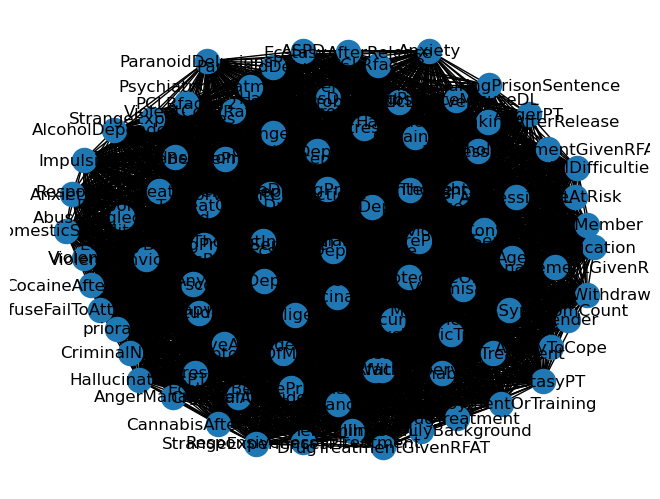

In [9]:
g = Graph(df_large)
print(g)
nx.draw(g, with_labels = True)

In [10]:
def PC_0(df, rho, G):
    '''
    finds 0th order conditional independencies (CI) between each node, if True then remove an edge 
    '''
    v = list(df)
    for i in v:
        G.add_node(i)
    k = list(itertools.combinations(v,2))
    for i,j in k:
        G.add_edge(i,j)
    ind_0 = [x[:2] for x in chi2bool(df, rho)[0]]
    for i,j in ind_0:
        G.remove_edge(i,j)
    print('the number of edges removed is:' , len(ind_0))
#     print(G)
    return(G, ind_0)

the number of edges removed is: 2687
Graph with 88 nodes and 1141 edges
CPU times: total: 16.2 s
Wall time: 16.2 s


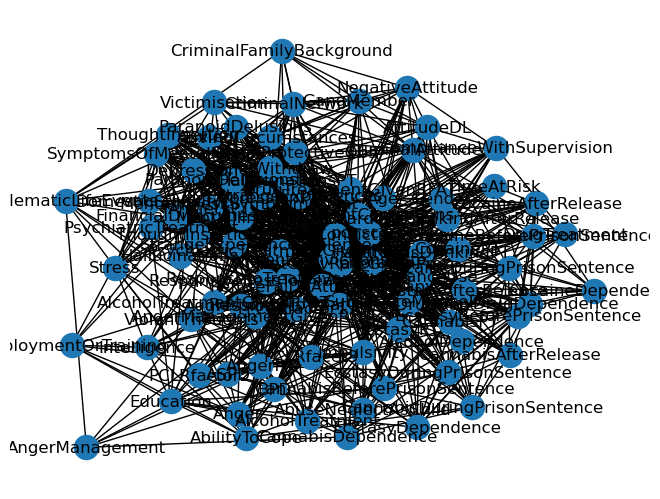

In [11]:
%%time
g_0 = PC_0(df_large, 0.05, g)[0]
print(g_0)
nx.draw(g_0, with_labels = True)

In [14]:
def find_adjacency_XY(graph):    
    '''
    finds adjacencies of XY in the graph
    Input: a graph from networkx
    Returns: a list containing (X,Y, [XY_adjacents]) where X and Y are connected by an edge and XY_adjacents are its adjacents
    '''
    test_list = []
    graph_list = list(graph.edges)
    for i,j in graph_list:
        test_list.append((i, j, list(graph.edges(i)), list(graph.edges(j))))
    n = 0
    N = len(test_list)
    edge_XY = []
    while n < N:
        ##
        adjacent_X = []
        adjacent_Y = []
        X, Y = test_list[n][0], test_list[n][1]
        k_X, k_Y = test_list[n][2], test_list[n][3]
        edge_X = [x for x in k_X if x[1] != Y]
        edge_Y = [x for x in k_Y if x[1] not in (y[1] for y in k_X) and x[1] != X]
        for x in edge_X:
            adjacent_X.append(x[1])
        for y in edge_Y:
            adjacent_Y.append(y[1])
        adjacent_XY = adjacent_X + adjacent_Y
        len_XY = len(adjacent_XY)
        edge_XY.append((X, Y, adjacent_XY, len_XY))
#         print(edge_XY)
        n += 1
    return edge_XY

In [13]:
adj = find_adjacency_XY(g_0)

In [16]:
def get_combinations(this_list, df, N_0, rho):
    '''
    this_list = one of the items in adj, eg: adj[1]
    probably the main function of everything
    given a list in the form
    '''
    adjacency = this_list[2]
    len_adjacency = len(adjacency)
    n = 1
    combinations = []
    while n <= N_0:
        k = list(itertools.combinations(adjacency, n))
        t = [list(x) for x in k]
#         return(k)
#         return(t)
        for i in t:
            chi2 = chi_square(X=this_list[0], Y=this_list[1], Z=i, data=df, significance_level=rho)
            if chi2 == True:
                combinations.append((this_list[0], this_list[1], i, chi2))
                print(combinations)
                return combinations
        n += 1

In [18]:
adj[2]

('PCLRfacet3',
 'AbuseNeglectAsChild',
 ['Impulsivity',
  'BPD',
  'PCLRfactor2',
  'ASPD',
  'prioracq',
  'Age',
  'pclrscore',
  'EcstasyAfterRelease',
  'AlcoholDependence',
  'SubstanceMisuseDL',
  'Violence',
  'ViolentConvictions',
  'Anger',
  'AngerPT',
  'AggressionDL',
  'ViolentConvictionsRate',
  'ViolentConvRateGivenProt',
  'Depression',
  'PsychiatricTreatment',
  'PsychiatricTreatmentGivenRFAT',
  'Stress',
  'HazardousDrinkingAfterRelease',
  'CocaineDuringPrisonSentence',
  'HazardousDrinkingPT'],
 24)

In [20]:
get_combinations(adj[4], df_large, 3, 0.05)

[('PCLRfacet3', 'ASPD', ['Impulsivity', 'BPD'], True)]


[('PCLRfacet3', 'ASPD', ['Impulsivity', 'BPD'], True)]

In [21]:
def combinations_adjacents(adj, df, N, rho):
    '''
    one of the main functions
    adj = output from find_adjacency_XY
    N = stopping point for how many combinations you want
    output: obtains the combinations of n=1,2,...N of the whole list in an unordered manner (see open_list)
    '''
    len_adjacents = len(adj)
    combinations = []
    for i in range(len_adjacents):
        t = get_combinations(adj[i], df, N, rho)
        combinations.append(t)
    return combinations

In [22]:
def PC_final(graph, adj, N, df, rho):
    '''
    graph = nx.graph
    adj = output from find_adjacency_XY
    N = order of conditional independence
    df = dataframe
    rho = significance_level
    '''
    X_Y = []
    combinations_chi2 = combinations_adjacents(adj, df, N, rho)
    for i in combinations_chi2:
        if i != None:
            for j in i:
                X_Y.append((j[0], j[1]))
    for i in X_Y:
        graph.remove_edge(i[0], i[1])
    return graph, X_Y

In [23]:
%%time
g_final = PC_final(g_0, adj, 1, df_large, 0.05)

[('PCLRfacet3', 'BPD', ['Impulsivity'], True)]
[('PCLRfacet3', 'AbuseNeglectAsChild', ['BPD'], True)]
[('PCLRfacet3', 'PCLRfactor2', ['Impulsivity'], True)]
[('PCLRfacet3', 'prioracq', ['Impulsivity'], True)]
[('PCLRfacet3', 'Age', ['Impulsivity'], True)]
[('PCLRfacet3', 'pclrscore', ['Violence'], True)]
[('PCLRfacet3', 'EcstasyAfterRelease', ['Impulsivity'], True)]
[('PCLRfacet3', 'AlcoholDependence', ['Impulsivity'], True)]
[('PCLRfacet3', 'SubstanceMisuseDL', ['AbuseNeglectAsChild'], True)]
[('PCLRfacet3', 'Violence', ['Impulsivity'], True)]
[('PCLRfacet3', 'ViolentConvictions', ['Impulsivity'], True)]
[('PCLRfacet3', 'Anger', ['Impulsivity'], True)]
[('PCLRfacet3', 'AngerPT', ['Impulsivity'], True)]
[('PCLRfacet3', 'AggressionDL', ['Impulsivity'], True)]
[('PCLRfacet3', 'ViolentConvictionsRate', ['Impulsivity'], True)]
[('PCLRfacet3', 'ViolentConvRateGivenProt', ['Impulsivity'], True)]
[('PCLRfacet3', 'Depression', ['Impulsivity'], True)]
[('PCLRfacet3', 'PsychiatricTreatment', ['I

[('CriminalNetwork', 'DepressionPT', ['SocialProtectiveObs'], True)]
[('CriminalNetwork', 'PsychiatricTreatment', ['PriorViolentConvictions'], True)]
[('CriminalNetwork', 'PsychiatricTreatmentGivenRFAT', ['SocialProtectiveObs'], True)]
[('CriminalNetwork', 'MentalIllnessSymptomCount', ['SocialProtectiveObs'], True)]
[('CriminalNetwork', 'MentalIllnessDL', ['SocialProtectiveObs'], True)]
[('prioracq', 'Age', ['Violence'], True)]
[('prioracq', 'Gender', ['Violence'], True)]
[('prioracq', 'PriorViolentConvictions', ['Violence'], True)]
[('prioracq', 'pclrscore', ['Violence'], True)]
[('prioracq', 'TimeAtRisk', ['Violence'], True)]
[('prioracq', 'DomesticStability', ['AbilityToCope'], True)]
[('prioracq', 'ComplianceWithSupervision', ['BPD'], True)]
[('prioracq', 'NegativeAttitude', ['Violence'], True)]
[('prioracq', 'CriminalAttitude', ['Violence'], True)]
[('prioracq', 'RefuseFailToAttendTherapy', ['PCLRfacet3'], True)]
[('prioracq', 'HazardousDrinkingAfterRelease', ['SubstanceUse'], Tru

[('pclrscore', 'CocaineAfterRelease', ['CocainePT'], True)]
[('pclrscore', 'EcstasyAfterRelease', ['Age'], True)]
[('pclrscore', 'AlcoholDependence', ['HazardousDrinkingAfterRelease'], True)]
[('pclrscore', 'EcstasyPT', ['Age'], True)]
[('pclrscore', 'CannabisPT', ['CannabisAfterRelease'], True)]
[('pclrscore', 'CocainePT', ['CocaineAfterRelease'], True)]
[('pclrscore', 'SubstanceUse', ['SubstanceMisuseDL'], True)]
[('pclrscore', 'SubstanceMisuseDL', ['Violence'], True)]
[('pclrscore', 'ViolentConvictions', ['Violence'], True)]
[('pclrscore', 'ResponseToTreatGivenAlcDep', ['PCLRfacet3'], True)]
[('pclrscore', 'HazardousDrinkingPT', ['SubstanceMisuseDL'], True)]
[('pclrscore', 'AttitudeDL', ['Violence'], True)]
[('pclrscore', 'AggressionDL', ['Violence'], True)]
[('pclrscore', 'LivingCircumstances', ['Violence'], True)]
[('pclrscore', 'SocialProtectiveObs', ['Violence'], True)]
[('pclrscore', 'SocialWithdraw', ['PCLRfacet3'], True)]
[('pclrscore', 'ViolentConvictionsRate', ['Violence'],

[('NegativeAttitude', 'Violence', ['AttitudeDL'], True)]
[('NegativeAttitude', 'ViolentConvictions', ['AttitudeDL'], True)]
[('NegativeAttitude', 'LivingCircumstances', ['CriminalNetwork'], True)]
[('NegativeAttitude', 'SocialProtectiveObs', ['CriminalNetwork'], True)]
[('NegativeAttitude', 'ViolentConvictionsRate', ['AttitudeDL'], True)]
[('NegativeAttitude', 'ViolentConvRateGivenProt', ['AttitudeDL'], True)]
[('CriminalAttitude', 'HazardousDrinkingAfterRelease', ['Victimisation'], True)]
[('CriminalAttitude', 'CocaineBeforePrisonSentence', ['Impulsivity'], True)]
[('CriminalAttitude', 'AnyDrugDependence', ['prioracq'], True)]
[('CriminalAttitude', 'CocaineDependence', ['Victimisation'], True)]
[('CriminalAttitude', 'DrugTreatment', ['prioracq'], True)]
[('CriminalAttitude', 'DrugTreatmentGivenRFAT', ['Victimisation'], True)]
[('CriminalAttitude', 'Violence', ['AttitudeDL'], True)]
[('CriminalAttitude', 'ViolentConvictions', ['AttitudeDL'], True)]
[('CriminalAttitude', 'HazardousDrink

[('EcstasyBeforePrisonSentence', 'EcstasyPT', ['EcstasyAfterRelease'], True)]
[('EcstasyBeforePrisonSentence', 'SubstanceUse', ['EcstasyAfterRelease'], True)]
[('EcstasyBeforePrisonSentence', 'SubstanceMisuseDL', ['EcstasyAfterRelease'], True)]
[('EcstasyBeforePrisonSentence', 'Violence', ['EcstasyAfterRelease'], True)]
[('EcstasyBeforePrisonSentence', 'ViolentConvictions', ['EcstasyAfterRelease'], True)]
[('EcstasyBeforePrisonSentence', 'ViolentConvictionsRate', ['EcstasyAfterRelease'], True)]
[('EcstasyBeforePrisonSentence', 'ViolentConvRateGivenProt', ['EcstasyAfterRelease'], True)]
[('EcstasyBeforePrisonSentence', 'StrangeExperiences', ['PriorViolentConvictions'], True)]
[('EcstasyDuringPrisonSentence', 'AnyDrugDependence', ['EcstasyDependence'], True)]
[('EcstasyDuringPrisonSentence', 'EcstasyPT', ['EcstasyAfterRelease'], True)]
[('EcstasyDuringPrisonSentence', 'SubstanceUse', ['EcstasyAfterRelease'], True)]
[('EcstasyDuringPrisonSentence', 'SubstanceMisuseDL', ['EcstasyAfterRelea

[('DrugTreatment', 'SubstanceMisuseDL', ['DrugTreatmentGivenRFAT'], True)]
[('DrugTreatment', 'Violence', ['ComplianceWithSupervision'], True)]
[('DrugTreatment', 'ViolentConvictionsRate', ['CocainePT'], True)]
[('DrugTreatment', 'ViolentConvRateGivenProt', ['CocainePT'], True)]
[('AlcoholTreatment', 'SubstanceUse', ['HazardousDrinkingPT'], True)]
[('AlcoholTreatment', 'SubstanceMisuseDL', ['AlcoholTreatmentGivenRFAT'], True)]
[('AlcoholTreatment', 'ResponsivenessToTreatment', ['Education'], True)]
[('AlcoholTreatment', 'ResponseToTreatGivenAlcDep', ['ViolentConvictionsRate'], True)]
[('AlcoholTreatment', 'ResponseToTreatGivenDrugDep', ['Education'], True)]
[('AlcoholTreatment', 'AngerPT', ['Education'], True)]
[('AlcoholTreatment', 'HazardousDrinkingPT', ['AlcoholTreatmentGivenRFAT'], True)]
[('AlcoholTreatment', 'ViolentConvictionsRate', ['SubstanceUse'], True)]
[('AlcoholTreatment', 'ViolentConvRateGivenProt', ['Education'], True)]
[('AlcoholTreatment', 'StrangeExperiencesPT', ['Edu

[('Violence', 'HallucinationsPT', ['ViolentConvictionsRate'], True)]
[('Violence', 'StrangeExperiences', ['Age'], True)]
[('Violence', 'StrangeExperiencesPT', ['ViolentConvRateGivenProt'], True)]
[('Violence', 'ParanoidDelusions', ['ViolentConvictionsRate'], True)]
[('Violence', 'ParanoidDelusionsPT', ['ViolentConvictionsRate'], True)]
[('Violence', 'PsychiatricTreatment', ['ViolentConvRateGivenProt'], True)]
[('Violence', 'PsychiatricTreatmentGivenRFAT', ['ViolentConvictionsRate'], True)]
[('Violence', 'MentalIllnessSymptomCount', ['ViolentConvRateGivenProt'], True)]
[('Violence', 'MentalIllnessDL', ['ViolentConvictionsRate'], True)]
[('ViolentConvictions', 'ResponseToTreatGivenAlcDep', ['PCLRfacet3'], True)]
[('ViolentConvictions', 'Anger', ['PCLRfacet3'], True)]
[('ViolentConvictions', 'AngerPT', ['PCLRfacet3'], True)]
[('ViolentConvictions', 'HazardousDrinkingPT', ['SubstanceMisuseDL'], True)]
[('ViolentConvictions', 'AttitudeDL', ['ViolentConvictionsRate'], True)]
[('ViolentConvic

[('LivingCircumstances', 'AnxietyPT', ['FinancialDifficulties'], True)]
[('LivingCircumstances', 'PsychiatricTreatment', ['CriminalNetwork'], True)]
[('LivingCircumstances', 'MentalIllnessSymptomCount', ['FinancialDifficulties'], True)]
[('LivingCircumstances', 'MentalIllnessDL', ['FinancialDifficulties'], True)]
[('SocialProtectiveObs', 'ViolentConvictionsRate', ['SocialWithdraw'], True)]
[('SocialProtectiveObs', 'Depression', ['DepressionPT'], True)]
[('SocialProtectiveObs', 'ThoughtInsertion', ['SymptomsOfMentalIllness'], True)]
[('SocialProtectiveObs', 'ThoughtInsertionPT', ['SocialWithdraw'], True)]
[('SocialProtectiveObs', 'Hallucinations', ['SymptomsOfMentalIllness'], True)]
[('SocialProtectiveObs', 'HallucinationsPT', ['SocialWithdraw'], True)]
[('SocialProtectiveObs', 'StrangeExperiences', ['SymptomsOfMentalIllness'], True)]
[('SocialProtectiveObs', 'StrangeExperiencesPT', ['SocialWithdraw'], True)]
[('SocialProtectiveObs', 'ParanoidDelusions', ['SymptomsOfMentalIllness'], Tru

[('Hallucinations', 'MentalIllnessDL', ['MentalIllnessSymptomCount'], True)]
[('HallucinationsPT', 'StrangeExperiences', ['SymptomsOfMentalIllness'], True)]
[('HallucinationsPT', 'ParanoidDelusions', ['SymptomsOfMentalIllness'], True)]
[('HallucinationsPT', 'PsychiatricTreatment', ['PsychiatricTreatmentGivenRFAT'], True)]
[('HallucinationsPT', 'MentalIllnessDL', ['MentalIllnessSymptomCount'], True)]
[('StrangeExperiences', 'ParanoidDelusions', ['SymptomsOfMentalIllness'], True)]
[('StrangeExperiences', 'ParanoidDelusionsPT', ['SymptomsOfMentalIllness'], True)]
[('StrangeExperiences', 'MentalIllnessDL', ['MentalIllnessSymptomCount'], True)]
[('StrangeExperiencesPT', 'ParanoidDelusions', ['SymptomsOfMentalIllness'], True)]
[('StrangeExperiencesPT', 'PsychiatricTreatment', ['PsychiatricTreatmentGivenRFAT'], True)]
[('StrangeExperiencesPT', 'MentalIllnessDL', ['MentalIllnessSymptomCount'], True)]
[('ParanoidDelusions', 'MentalIllnessDL', ['MentalIllnessSymptomCount'], True)]
[('Psychiatric

Graph with 88 nodes and 210 edges


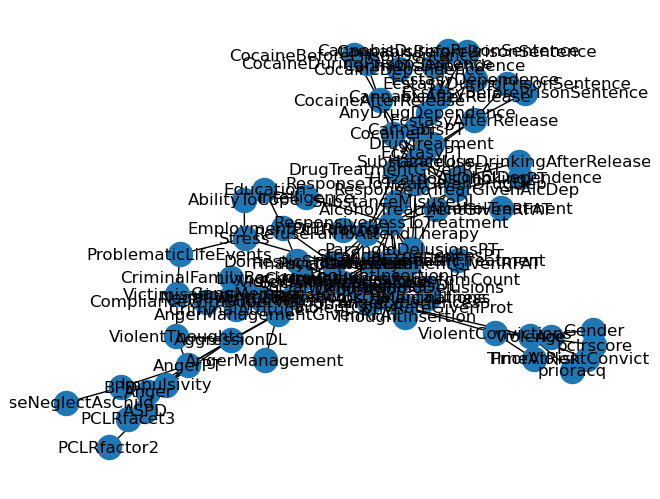

In [34]:
print(g_final[0])
nx.draw(g_final[0], with_labels=True)


In [27]:
ind = g_final[1] + chi2bool(df_large, 0.05)[0]

In [28]:
ind

[('PCLRfacet3', 'BPD'),
 ('PCLRfacet3', 'AbuseNeglectAsChild'),
 ('PCLRfacet3', 'PCLRfactor2'),
 ('PCLRfacet3', 'prioracq'),
 ('PCLRfacet3', 'Age'),
 ('PCLRfacet3', 'pclrscore'),
 ('PCLRfacet3', 'EcstasyAfterRelease'),
 ('PCLRfacet3', 'AlcoholDependence'),
 ('PCLRfacet3', 'SubstanceMisuseDL'),
 ('PCLRfacet3', 'Violence'),
 ('PCLRfacet3', 'ViolentConvictions'),
 ('PCLRfacet3', 'Anger'),
 ('PCLRfacet3', 'AngerPT'),
 ('PCLRfacet3', 'AggressionDL'),
 ('PCLRfacet3', 'ViolentConvictionsRate'),
 ('PCLRfacet3', 'ViolentConvRateGivenProt'),
 ('PCLRfacet3', 'Depression'),
 ('PCLRfacet3', 'PsychiatricTreatment'),
 ('PCLRfacet3', 'PsychiatricTreatmentGivenRFAT'),
 ('AbilityToCope', 'prioracq'),
 ('AbilityToCope', 'pclrscore'),
 ('AbilityToCope', 'Education'),
 ('AbilityToCope', 'EmploymentOrTraining'),
 ('AbilityToCope', 'CannabisBeforePrisonSentence'),
 ('AbilityToCope', 'CannabisDuringPrisonSentence'),
 ('AbilityToCope', 'ResponsivenessToTreatment'),
 ('AbilityToCope', 'ResponseToTreatGivenAlcDe

In [31]:
for i in ind:
    print(i[0], i[1])

PCLRfacet3 BPD
PCLRfacet3 AbuseNeglectAsChild
PCLRfacet3 PCLRfactor2
PCLRfacet3 prioracq
PCLRfacet3 Age
PCLRfacet3 pclrscore
PCLRfacet3 EcstasyAfterRelease
PCLRfacet3 AlcoholDependence
PCLRfacet3 SubstanceMisuseDL
PCLRfacet3 Violence
PCLRfacet3 ViolentConvictions
PCLRfacet3 Anger
PCLRfacet3 AngerPT
PCLRfacet3 AggressionDL
PCLRfacet3 ViolentConvictionsRate
PCLRfacet3 ViolentConvRateGivenProt
PCLRfacet3 Depression
PCLRfacet3 PsychiatricTreatment
PCLRfacet3 PsychiatricTreatmentGivenRFAT
AbilityToCope prioracq
AbilityToCope pclrscore
AbilityToCope Education
AbilityToCope EmploymentOrTraining
AbilityToCope CannabisBeforePrisonSentence
AbilityToCope CannabisDuringPrisonSentence
AbilityToCope ResponsivenessToTreatment
AbilityToCope ResponseToTreatGivenAlcDep
AbilityToCope ResponseToTreatGivenDrugDep
AbilityToCope PsychiatricTreatmentGivenRFAT
Stress Victimisation
Stress AbuseNeglectAsChild
Stress PCLRfactor2
Stress CriminalNetwork
Stress Intelligence
Stress SymptomsOfMentalIllness
Stress Cann

In [32]:
m = Gobnilp()
for i in ind:
    m.add_forbidden_adjacency((i[0], i[1]))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0


**********
BN has score -4193268.673363272
**********
ASPD<-AngerPT -66026.2371759977
AngerPT<-Anger,AngerManagementGivenRFAT -3005.0868203043938
AbilityToCope<-Intelligence -60502.31766535388
Intelligence<-ResponsivenessToTreatment -150975.14946794754
AbuseNeglectAsChild<- -64521.76408938796
Age<-Violence -206184.84018959268
Violence<-ViolentConvictions -8.819948717951775
AggressionDL<-Impulsivity,ViolentConvictionsRate,ViolentThoughts -48211.697555865394
Impulsivity<-ASPD,BPD -88369.36394330557
ViolentConvictionsRate<-AttitudeDL,MentalIllnessDL,SubstanceMisuseDL -104231.99930290598
ViolentThoughts<-AngerPT,Victimisation -43100.26978906465
AlcoholDependence<-HazardousDrinkingAfterRelease -22494.16726443253
HazardousDrinkingAfterRelease<-HazardousDrinkingPT -3705.391252095811
AlcoholTreatment<- -21905.629967646324
AlcoholTreatmentGivenRFAT<-AlcoholTreatment,RefuseFailToAttendTherapy -7.536084881983697
RefuseFailToAttendTherapy<- -56573.18186291086
Anger<- -55088.60284636391
AngerManage

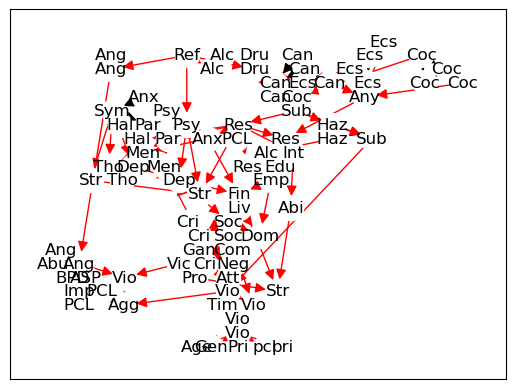

CPU times: total: 1min 31s
Wall time: 1min 29s


In [33]:
%%time
m.learn(r'FORMED_final_0.dat')

In [ ]:
tic = time.time()
g = Gobnilp()
g.learn(r'FORMED_final_0.dat')
toc = time.time()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-21
Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
